# **Logistic Regression Model, KFold**
---
##Author: Emmanuel Paalam
##Dataset has 13119 rows and 212 columns, preprocessed
## V2: SMOTE-oversampled data used
##Target variable: F3EVERDO

##Import datasets, convert to DataFrame

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Load the transformed data
X_train = np.load('/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/X_train_SMOTE.5.npy')
X_test = np.load('/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/X_test_SMOTE.5.npy')
y_train = np.load('/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/y_train_SMOTE.5.npy')
y_test = np.load('/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/y_test_SMOTE.5.npy')

# Load the feature names (optional)
with open('/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/feature_names.txt', 'r') as f:
    feature_names = [line.strip() for line in f]

##Make model

### Create new LG model

In [3]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression(max_iter=1000, penalty='none')

### Perform cross-validation

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import KFold

# Initialize lists to store metrics
acc_scores = []
ppv_scores = []
npv_scores = []
spec_scores = []
sens_scores = []
f1_scores = []
roc_auc_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=36)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics
    acc_scores.append(accuracy_score(y_val_fold, y_val_pred))
    ppv_scores.append(precision_score(y_val_fold, y_val_pred))
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_val_pred).ravel()
    npv_scores.append(tn / (tn + fn))
    spec_scores.append(tn / (tn + fp))
    sens_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_pred))

# Print average evaluation metrics over all folds
print(f'Average Accuracy: {np.mean(acc_scores)}')
print(f'Average Precision (PPV): {np.mean(ppv_scores)}')
print(f'Average NPV: {np.mean(npv_scores)}')
print(f'Average Specificity: {np.mean(spec_scores)}')
print(f'Average Sensitivity: {np.mean(sens_scores)}')
print(f'Average F1-Score: {np.mean(f1_scores)}')
print(f'Average ROC-AUC: {np.mean(roc_auc_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/d

Average Accuracy: 0.8731316749166481
Average Precision (PPV): 0.8259654385580261
Average NPV: 0.8949531640298016
Average Specificity: 0.917228125746058
Average Sensitivity: 0.7852134972250007
Average F1-Score: 0.8049757836957422
Average ROC-AUC: 0.8512208114855294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predict on testing, metrics

In [25]:
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Confusion matrix for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity and negative predictive value for testing data
test_specificity = tn_test / (tn_test + fp_test)
test_npv = tn_test / (tn_test + fn_test)

# Print the evaluation metrics for testing data
print('Evaluation metrics for testing data:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision (PPV): {test_precision}')
print(f'Test Recall (Sensitivity): {test_recall}')
print(f'Test F1-Score: {test_f1}')
print(f'Test ROC-AUC: {test_roc_auc}')
print(f'Test Specificity: {test_specificity}')
print(f'Test Negative Predictive Value (NPV): {test_npv}')

Evaluation metrics for testing data:
Test Accuracy: 0.8990091463414634
Test Precision (PPV): 0.5061425061425061
Test Recall (Sensitivity): 0.762962962962963
Test F1-Score: 0.6085672082717872
Test ROC-AUC: 0.8387881934610907
Test Specificity: 0.9146134239592183
Test Negative Predictive Value (NPV): 0.9711321605773567


In [26]:
# Predicting a single data point using NumPy indexing to avoid KeyError
index = 1
single_test_case = X_test[index].reshape(1, -1)
single_prediction = model.predict(single_test_case)

print("\nSingle Test Case Prediction:")
print(single_prediction)
print("Real value: ")
print(y_test[index])


Single Test Case Prediction:
[0]
Real value: 
0


In [27]:
# Calculate the percentage of target values
minority_class = X_train[y_train == 1]
majority_class = X_train[y_train == 0]
print(len(minority_class))
print(len(majority_class))

4708
9417


Confusion Matrix:
[[2153  201]
 [  64  206]]


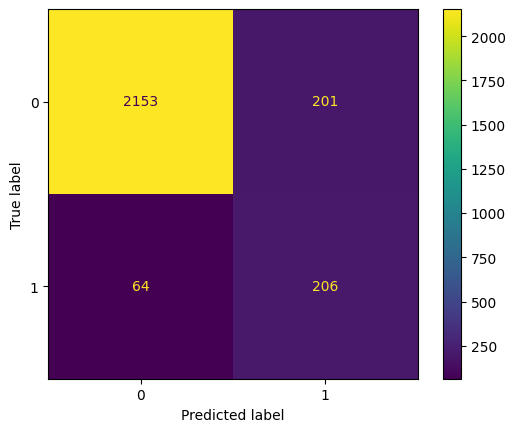

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Confusion Matrix:")
print(cm)